# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
Some observations that would be concluded from figures:

 Treatment Efficacy: The box plot comparing the tumor volume distribution across different treatment regimens suggests that Capomulin and Ramicane may be more effective in reducing tumor size compared to Infubinol and Ceftamin.

Mouse Weight and Tumor Volume: The scatter plot of mouse weight versus average observed tumor volume for the Capomulin treatment regimen indicates a positive correlation, suggesting that as mouse weight increases, average tumor volume tends to increase as well.

Correlation and Linear Regression: The positive correlation coefficient between mouse weight and average observed tumor volume for the Capomulin regimen, along with the positive slope of the linear regression line, supports the notion that there is a positive relationship between mouse weight and tumor volume.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combine_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
combine_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_of_mice = len(combine_data["Mouse ID"].unique())
print(number_of_mice)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combine_data.groupby(["Mouse ID", "Timepoint"]).size().reset_index(name="Count")
duplicate_mice = duplicate_mice[duplicate_mice["Count"] > 1]
print("Duplicate mice:")
print(duplicate_mice)

Duplicate mice:
    Mouse ID  Timepoint  Count
586     g989          0      2
587     g989          5      2
588     g989         10      2
589     g989         15      2
590     g989         20      2


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = combine_data[combine_data['Mouse ID']== 'g989']
# Display the data for the duplicate Mouse ID(s)
print("Data for the duplicate Mouse ID(s):")
duplicate_data

Data for the duplicate Mouse ID(s):


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combine_data.drop_duplicates(subset="Mouse ID", keep="first")
print("Clean DataFrame:")
clean_data

Clean DataFrame:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice = clean_data["Mouse ID"].nunique()
print(num_mice)

249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 


# Assuming you have the combine_data DataFrame containing columns: 'Drug Regimen' and 'Tumor Volume (mm3)'

# Use groupby() to group the data by 'Drug Regimen'
grouped_data = combine_data.groupby('Drug Regimen')['Tumor Volume (mm3)']

# Calculate the mean, median, standard deviation, variance, and SEM of the tumor volume
summary_stats = pd.DataFrame({
    'Mean Tumor Volume': grouped_data.mean().round(6),
    'Median Tumor Volume': grouped_data.median().round(6),
    'Tumor Volume Std. Dev.': grouped_data.std().round(6),
    'Tumor Volume Variance': grouped_data.var().round(6),
    'Tumor Volume Std. Err.': grouped_data.sem().round(6)
})

# Display the summary statistics DataFrame

summary_stats



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Std. Dev.,Tumor Volume Variance,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.322552,50.854632,6.507770,42.351070,0.512884
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_stats = combine_data.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']}).round(6)

summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance',
                         'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']

summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

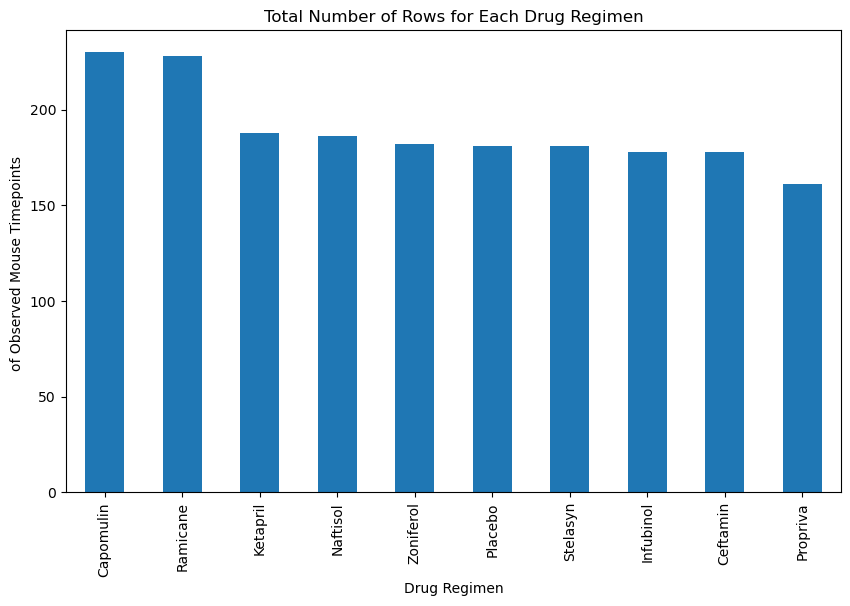

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = combine_data['Drug Regimen'].value_counts()

# Plot the bar chart
drug_counts.plot(kind='bar', figsize=(10, 6))

# Set the plot title and axis labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('of Observed Mouse Timepoints ')

# Show the plot
plt.show()

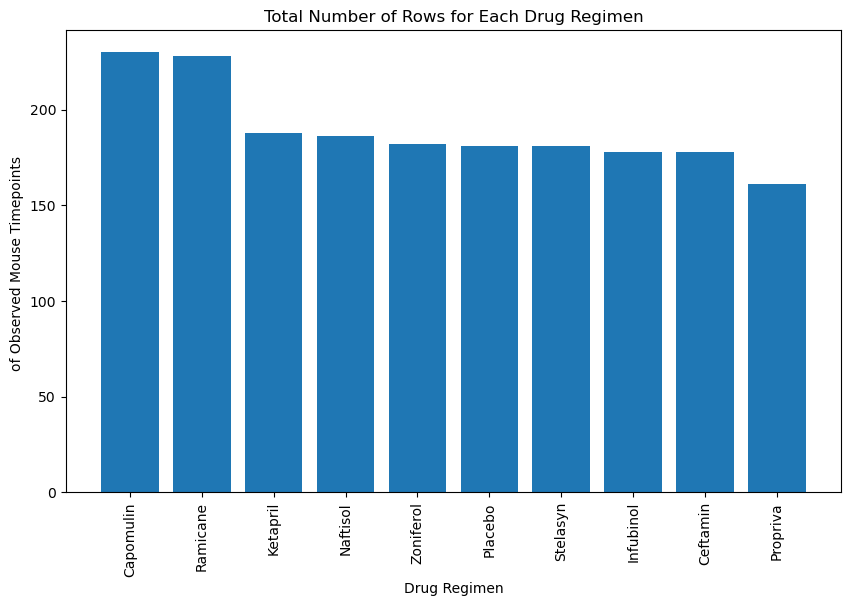

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts = combine_data['Drug Regimen'].value_counts()

regimens = drug_counts.index
row_counts = drug_counts.values

plt.figure(figsize=(10, 6))
plt.bar(regimens, row_counts)

plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('of Observed Mouse Timepoints ')

plt.xticks(rotation=90)

plt.show()


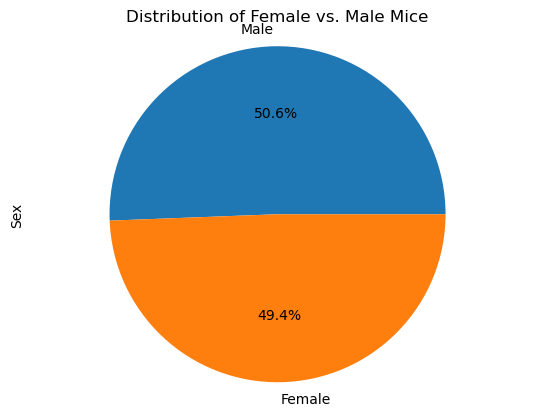

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_counts = combine_data['Sex'].value_counts()
sex_counts.plot(kind='pie', autopct='%1.1f%%', startangle=0)
plt.title('Distribution of Female vs. Male Mice')
plt.axis('equal')

plt.show()


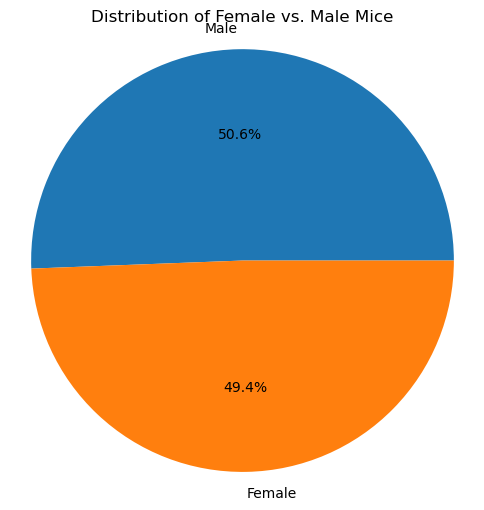

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_counts = combine_data['Sex'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribution of Female vs. Male Mice')
plt.axis('equal')

plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = combine_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(max_timepoints, combine_data, on=['Mouse ID', 'Timepoint'], how='left')



In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
 
for regimen in treatment:
    regimen_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == regimen]
    tumor_volumes = regimen_data['Tumor Volume (mm3)']
    tumor_volume_data.append(tumor_volumes)
    
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_bound = quartiles[0.25] - 1.5 * (quartiles[0.75] - quartiles[0.25])
    upper_bound = quartiles[0.75] + 1.5 * (quartiles[0.75] - quartiles[0.25])
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
   
    print(f"{regimen}'s potential outliers:")
    print(outliers)
    print()


Capomulin's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's potential outliers:
31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)



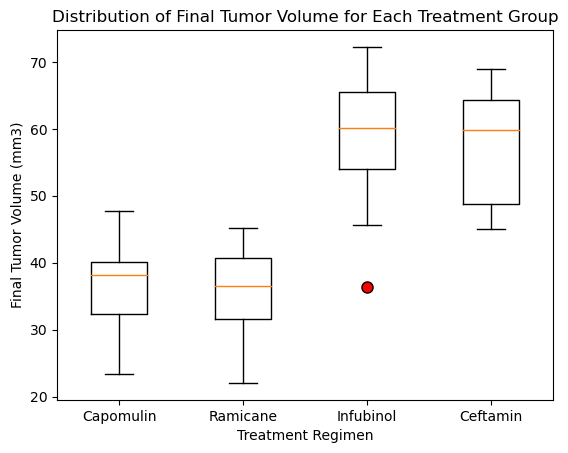

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a list of tumor volume data for each treatment group

last_timepoint = combine_data.groupby('Mouse ID')['Timepoint'].max()
merged_data = pd.merge(combine_data, last_timepoint, on=['Mouse ID', 'Timepoint'])
treatment_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume_data = []
for treatment in treatment_names:
    final_tumor_volume = merged_data.loc[merged_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    tumor_volume_data.append(final_tumor_volume)
outliers = []
for data in tumor_volume_data:
    quartiles = data.quantile([0.25, 0.5, 0.75])
    lower_bound = quartiles[0.25] - 1.5 * (quartiles[0.75] - quartiles[0.25])
    upper_bound = quartiles[0.75] + 1.5 * (quartiles[0.75] - quartiles[0.25])
    potential_outliers = data.loc[(data < lower_bound) | (data > upper_bound)]
    outliers.append(potential_outliers)



plt.boxplot(tumor_volume_data, labels=treatment_names, flierprops=dict(marker='o', markerfacecolor='red', markersize=8))

plt.xlabel('Treatment Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Distribution of Final Tumor Volume for Each Treatment Group')


plt.show()








## Line and Scatter Plots

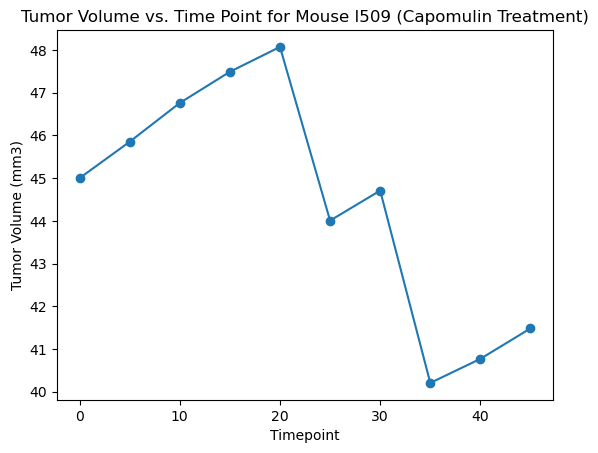

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
import matplotlib.pyplot as plt

# Choose a mouse ID treated with Capomulin
mouse_id = 'l509'

# Filter the dataset for the chosen mouse and Capomulin treatment
mouse_data = combine_data.loc[(combine_data['Mouse ID'] == mouse_id) & (combine_data['Drug Regimen'] == 'Capomulin')]

# Create the line plot
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o')

# Add labels and title to the plot
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin Treatment)')

# Show the plot
plt.show()


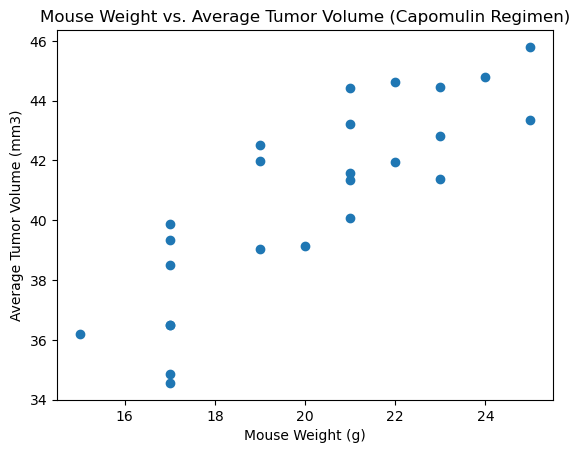

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = combine_data[combine_data['Drug Regimen'] == 'Capomulin']
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(mouse_weight, avg_tumor_volume)

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')

plt.show()



## Correlation and Regression

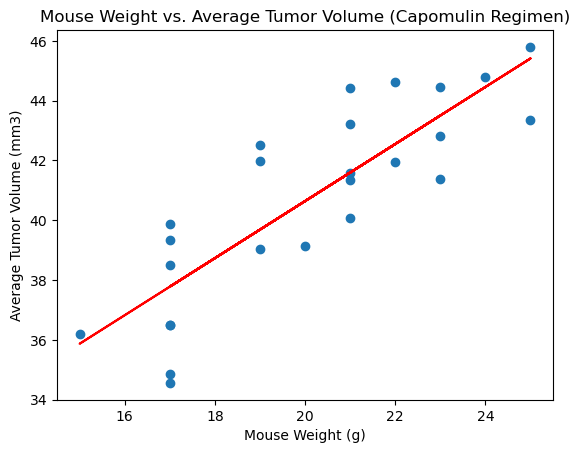

Correlation coefficient: 0.84


In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = combine_data[combine_data['Drug Regimen'] == 'Capomulin']
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

correlation = stats.pearsonr(mouse_weight, avg_tumor_volume)[0]

slope, intercept, r_value, p_value, std_err = stats.linregress(mouse_weight, avg_tumor_volume)
plt.scatter(mouse_weight, avg_tumor_volume, label='Data')
plt.plot(mouse_weight, slope * mouse_weight + intercept, color='red', label='Linear Regression')

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')

plt.show()

print("Correlation coefficient:", round(correlation, 2))




